## CASK FR1 Correct Rate

In [26]:
import sys
sys.path.insert(0, '../scripts')

from accuracy import graph_cumulative_acc, instant_acc, time_high_acc, graph_instant_acc, graph_avg_corr_rate
import intervals as invs
from preprocessing import read_excel_by_sheet
import paths

path = '../behavior data integrated/Adjusted FED3 Data.xlsx'

#### Define preprocess function for read excel

In [27]:
ctrl_ending_corr = []
cask_ending_corr = []
ctrl_dict_corr = {}
cask_dict_corr = {}

def read_and_record(path:str, sheet:str, ending_corr:list, dict_corr:list):
    df = read_excel_by_sheet(sheet, path)
    key = sheet.replace('.', '')
    value = df['Percent_Correct'].tail(1).values[0]
    
    ending_corr.append(value)
    dict_corr[key] = value
    return df

## Control Group

In [28]:
B2M1 = read_and_record(path, 'B2.M2', ctrl_ending_corr, ctrl_dict_corr)
B2M2 = read_and_record(path, 'B2.M3', ctrl_ending_corr, ctrl_dict_corr)
B2M3 = read_and_record(path, 'B2.M4', ctrl_ending_corr, ctrl_dict_corr)

### Learning Rate for Bhv 2

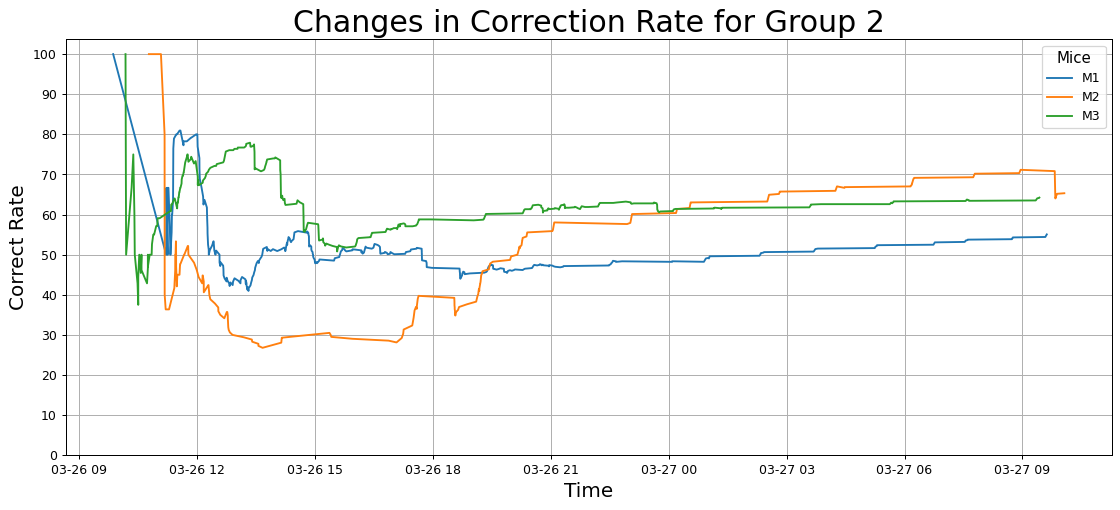

In [29]:
graph_cumulative_acc([B2M1, B2M2, B2M3], 2)

In [30]:
B3M1 = read_and_record(path, 'B3.M1', ctrl_ending_corr, ctrl_dict_corr)
B3M2 = read_and_record(path, 'B3.M2', ctrl_ending_corr, ctrl_dict_corr)
B3M3 = read_and_record(path, 'B3.M3', ctrl_ending_corr, ctrl_dict_corr)
B3M4 = read_and_record(path, 'B3.M4', ctrl_ending_corr, ctrl_dict_corr)

### Learning Rate for Bhv 3

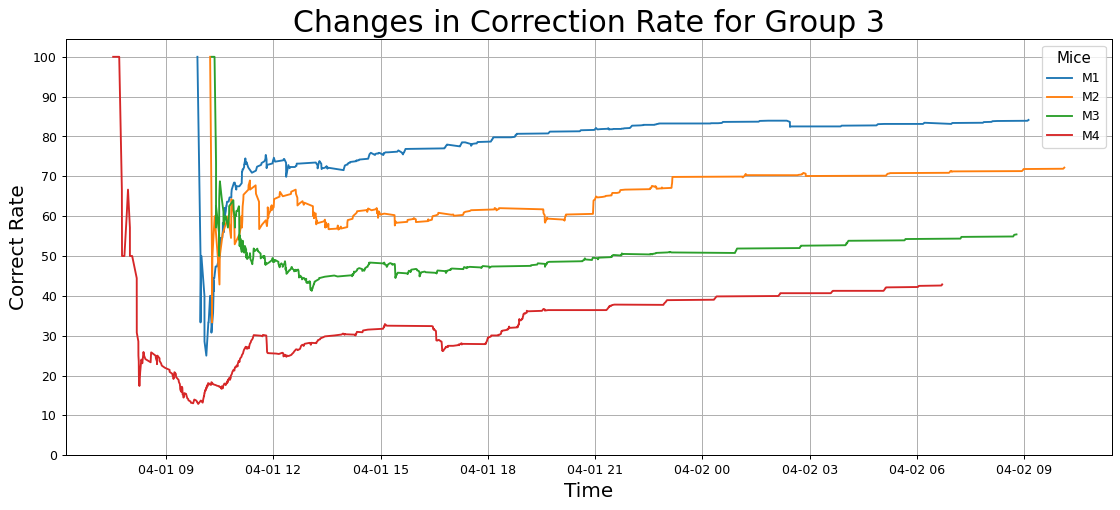

In [31]:
graph_cumulative_acc([B3M1, B3M2, B3M3, B3M4], 3)

In [32]:
B5M1 = read_and_record(path, 'B5.M1', ctrl_ending_corr, ctrl_dict_corr)
B5M2 = read_and_record(path, 'B5.M2', ctrl_ending_corr, ctrl_dict_corr)
B5M3 = read_and_record(path, 'B5.M3', ctrl_ending_corr, ctrl_dict_corr)
B5M4 = read_and_record(path, 'B5.M4', ctrl_ending_corr, ctrl_dict_corr)

### Learning Rate for Bhv 5

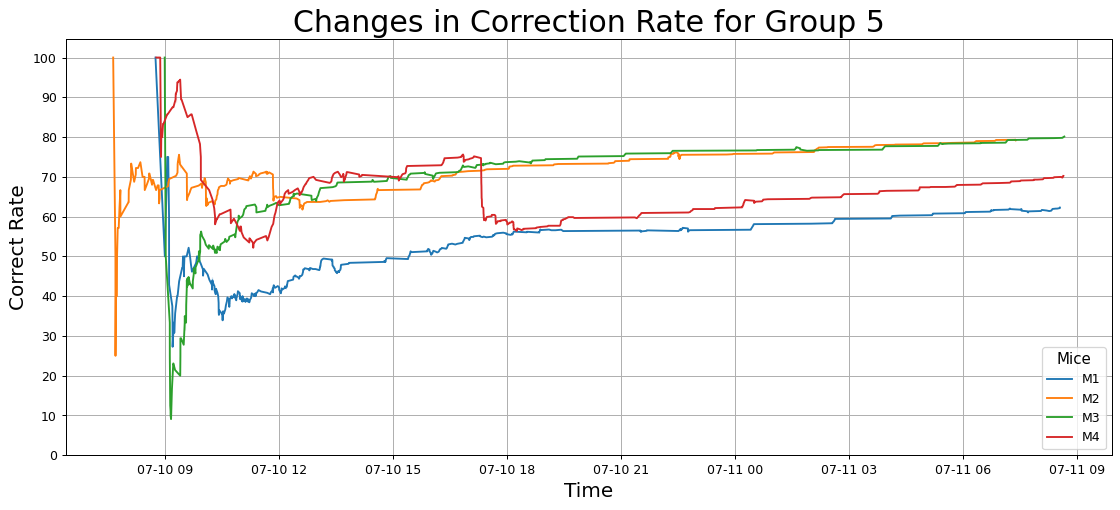

In [33]:
graph_cumulative_acc([B5M1, B5M2, B5M3, B5M4], 5)

In [34]:
B7M2 = read_and_record(path, 'B7.M2', ctrl_ending_corr, ctrl_dict_corr)
B7M3 = read_and_record(path, 'B7.M3', ctrl_ending_corr, ctrl_dict_corr)
B7M4 = read_and_record(path, 'B7.M4', ctrl_ending_corr, ctrl_dict_corr)

### Learning Rate for Bhv 7

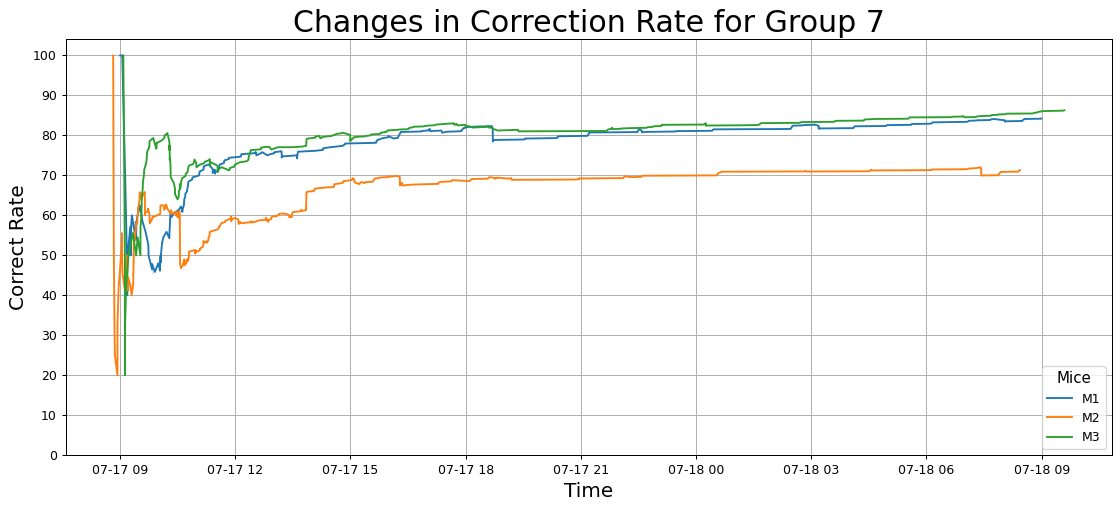

In [35]:
graph_cumulative_acc([B7M2, B7M3, B7M4], 7)

## CASK Experimental Group

In [36]:
B1M1 = read_and_record(path, 'B1.M1', cask_ending_corr, cask_dict_corr)
B1M2 = read_and_record(path, 'B1.M2', cask_ending_corr, cask_dict_corr)
B1M3 = read_and_record(path, 'B1.M3', cask_ending_corr, cask_dict_corr)

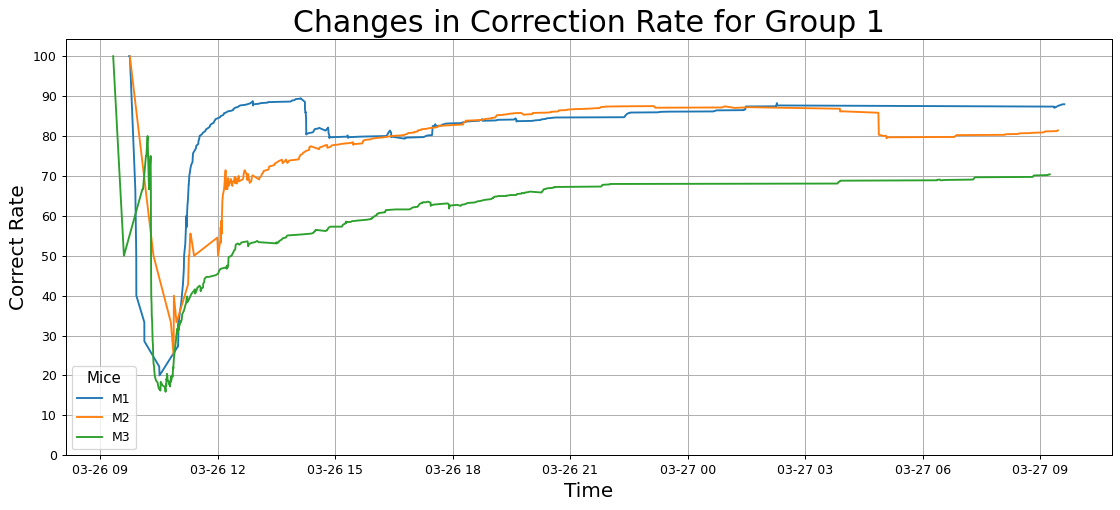

In [37]:
graph_cumulative_acc([B1M1, B1M2, B1M3], 1)

In [38]:
B4M1 = read_and_record(path, 'B4.M1', cask_ending_corr, cask_dict_corr)
B4M2 = read_and_record(path, 'B4.M2', cask_ending_corr, cask_dict_corr)
B4M3 = read_and_record(path, 'B4.M3', cask_ending_corr, cask_dict_corr)
B4M4 = read_and_record(path, 'B4.M4', cask_ending_corr, cask_dict_corr)

### Learning Rate for Bhv 4

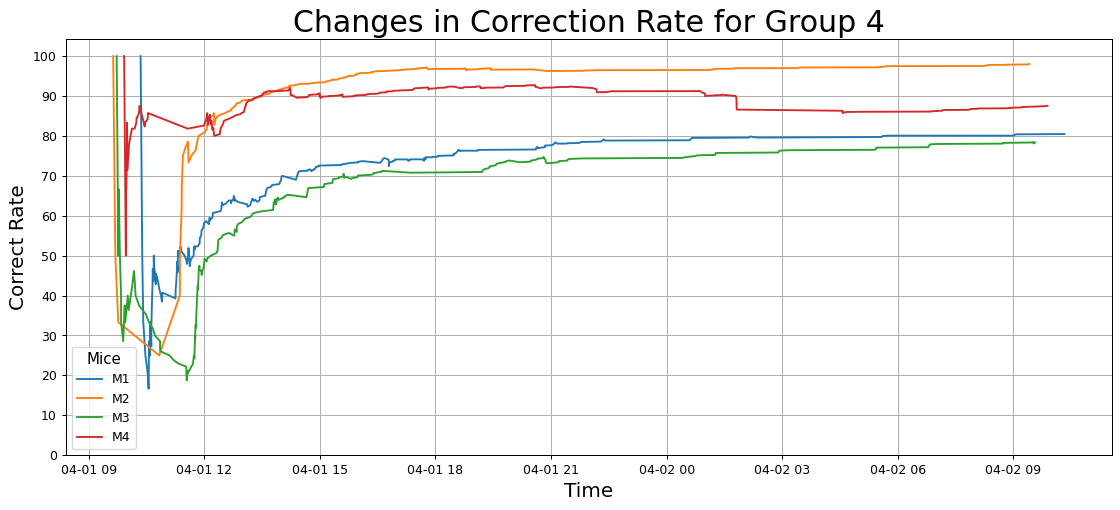

In [39]:
graph_cumulative_acc([B4M1, B4M2, B4M3, B4M4], 4)

In [40]:
B6M1 = read_and_record(path, 'B6.M1', cask_ending_corr, cask_dict_corr)
B6M2 = read_and_record(path, 'B6.M2', cask_ending_corr, cask_dict_corr)
B6M3 = read_and_record(path, 'B6.M3', cask_ending_corr, cask_dict_corr)
B6M4 = read_and_record(path, 'B6.M4', cask_ending_corr, cask_dict_corr)

### Learning Rate for Bhv 6

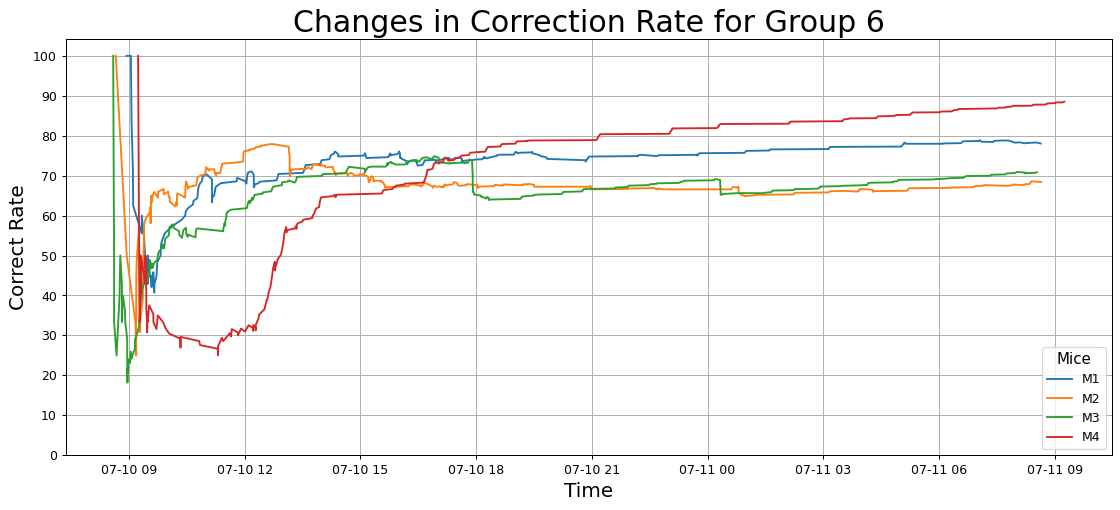

In [41]:
graph_cumulative_acc([B6M1, B6M2, B6M3, B6M4], 6)

In [42]:
B8M1 = read_and_record(path, 'B8.M1', cask_ending_corr, cask_dict_corr)
B8M2 = read_and_record(path, 'B8.M2', cask_ending_corr, cask_dict_corr)
B8M3 = read_and_record(path, 'B8.M3', cask_ending_corr, cask_dict_corr)

### Learning Rate for Bhv 8

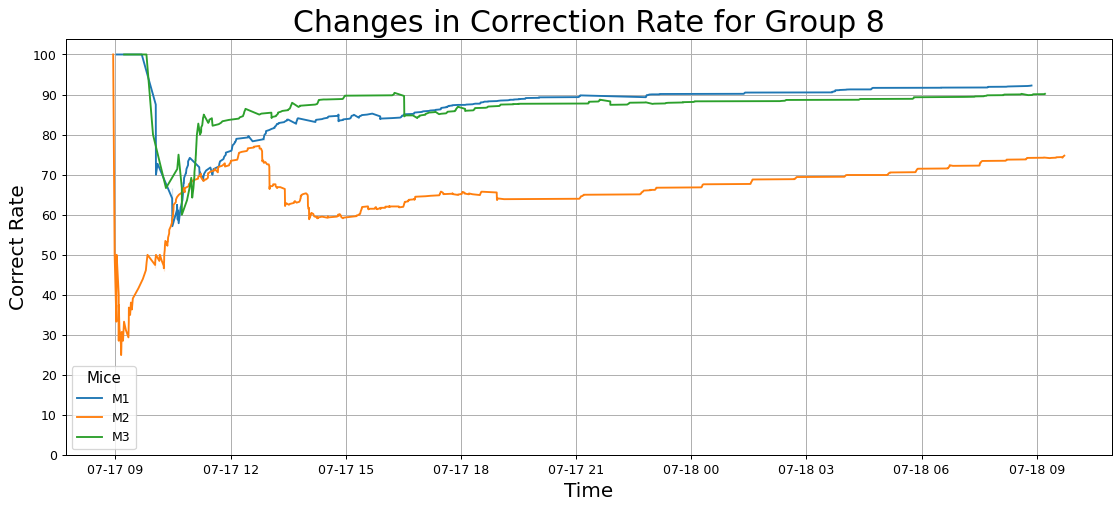

In [43]:
graph_cumulative_acc([B8M1, B8M2, B8M3], 8)

### Accuracy Grouped by 1 hour

### Control Group

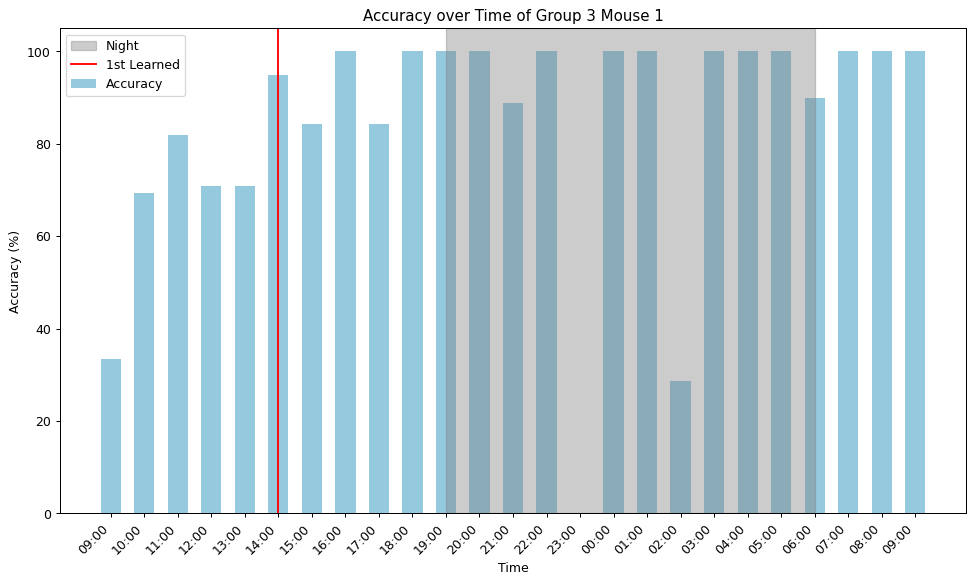

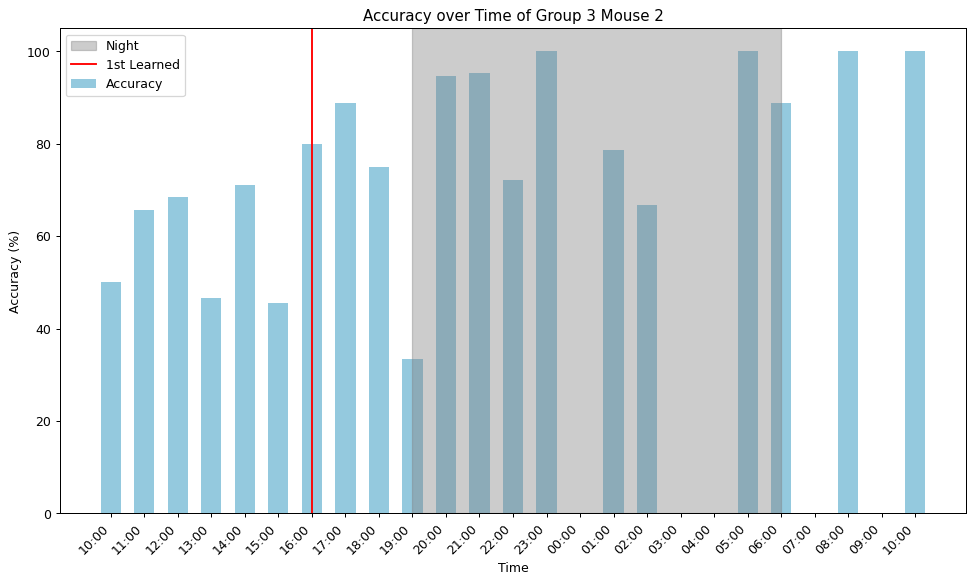

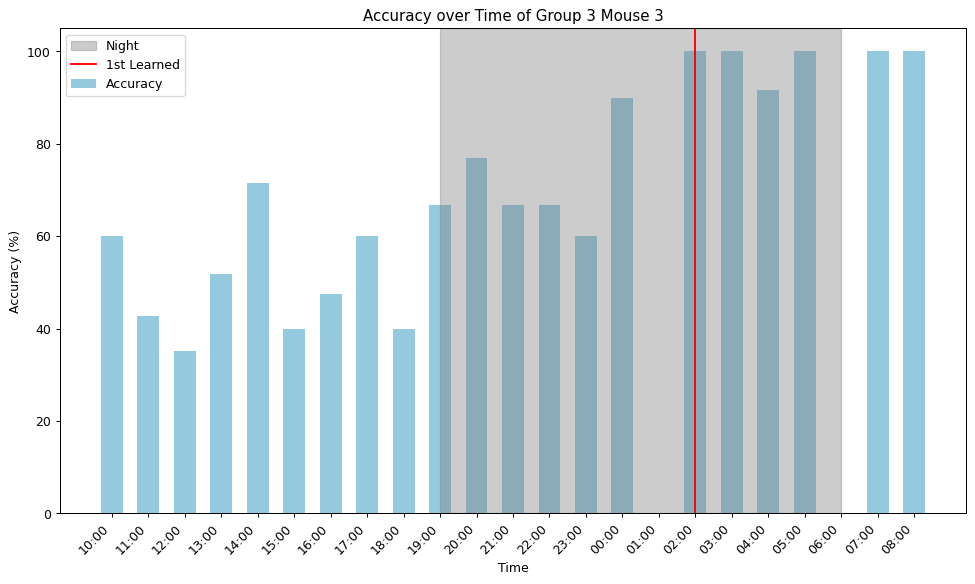

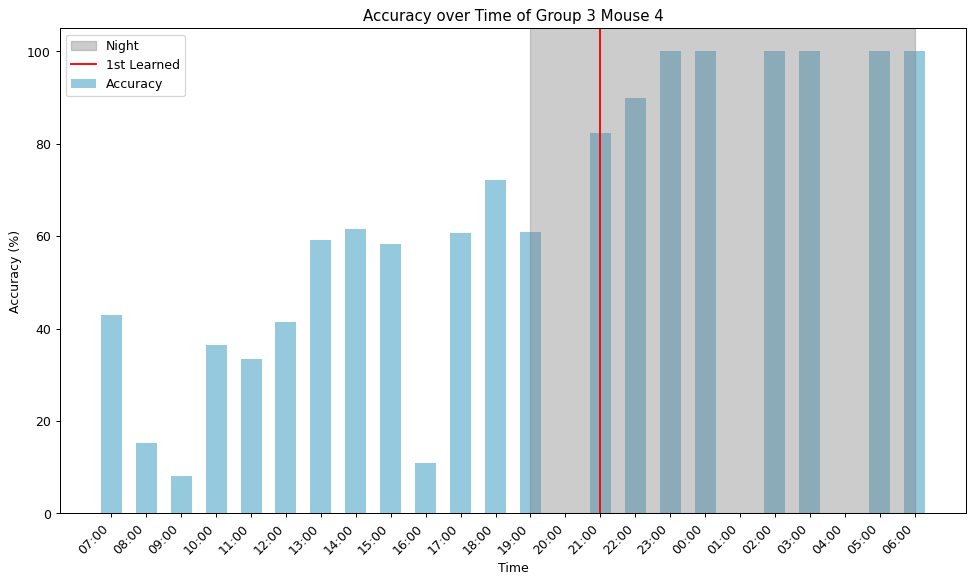

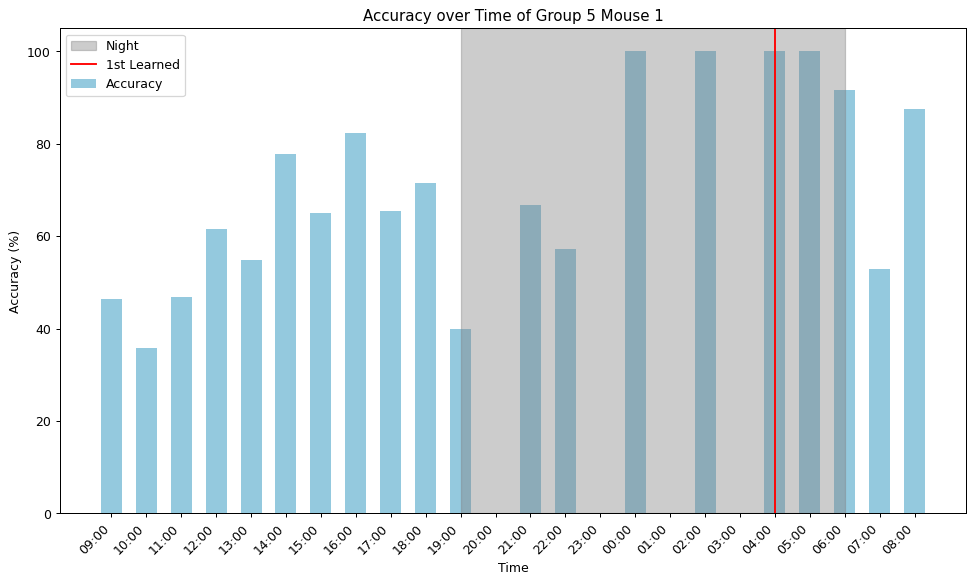

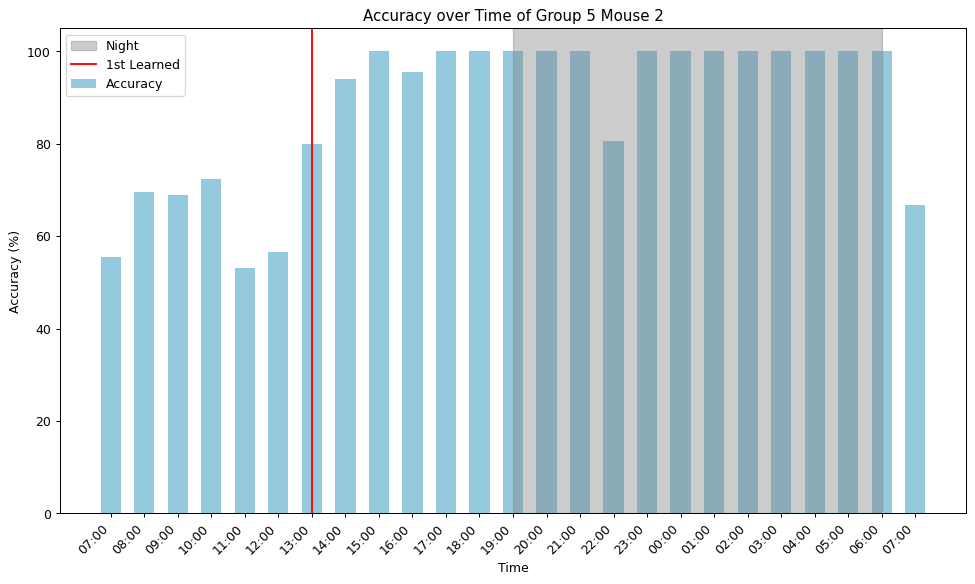

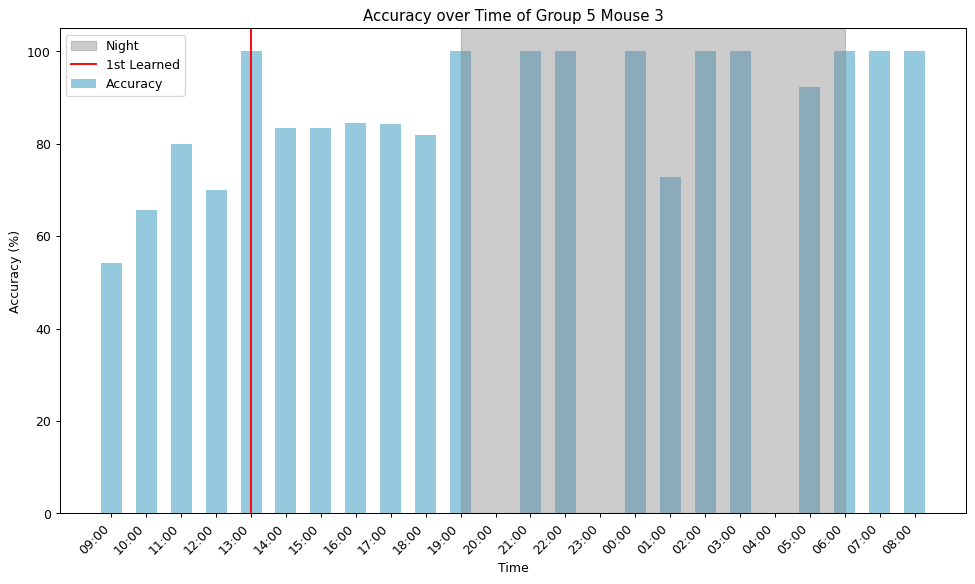

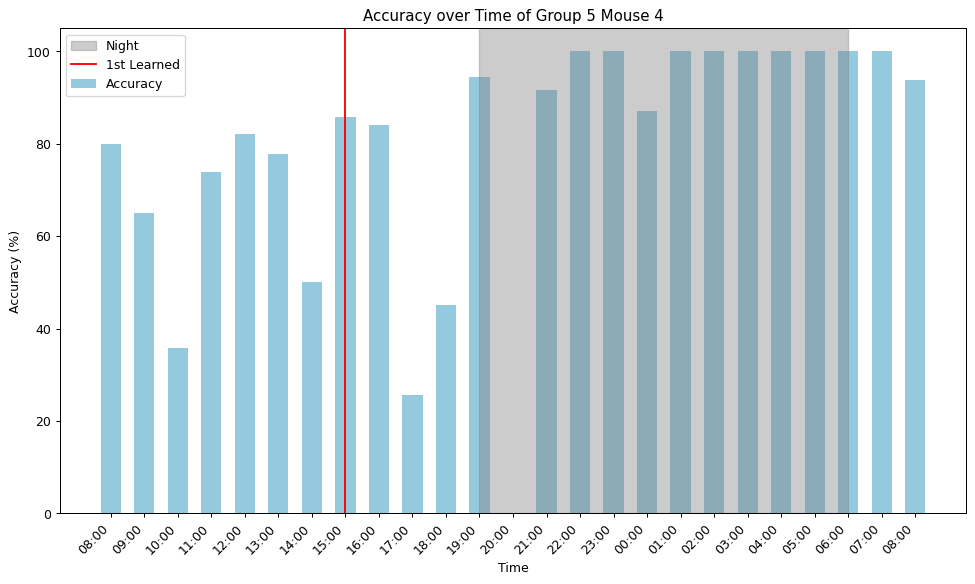

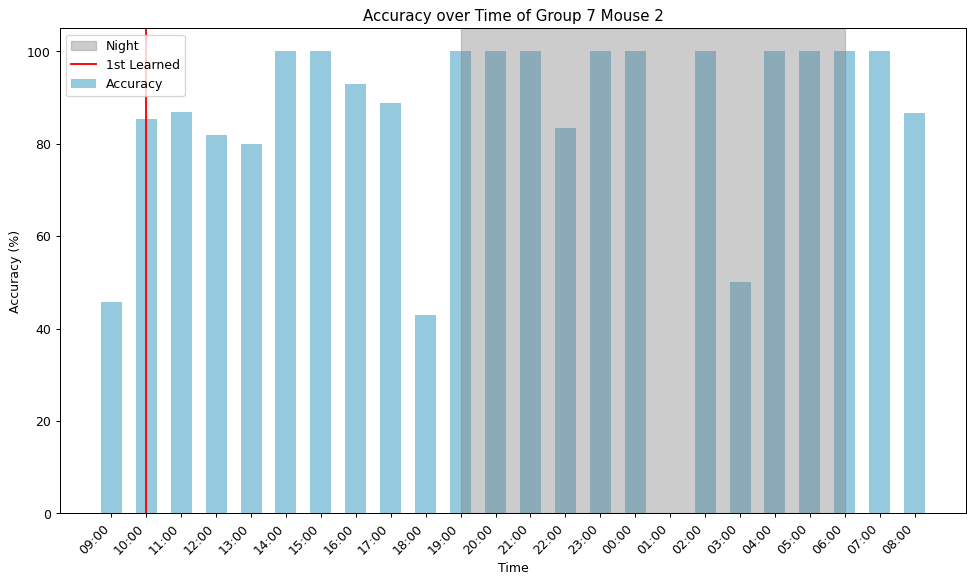

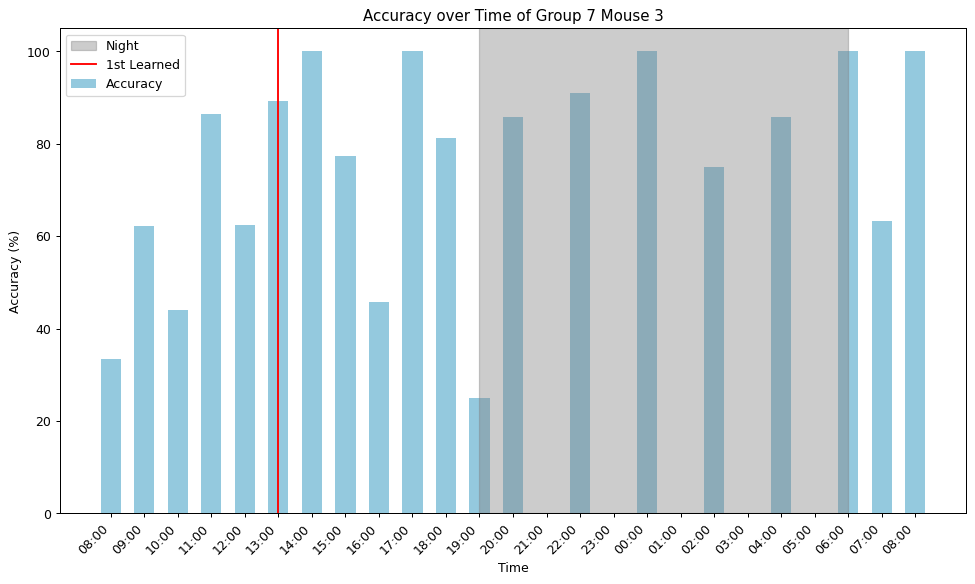

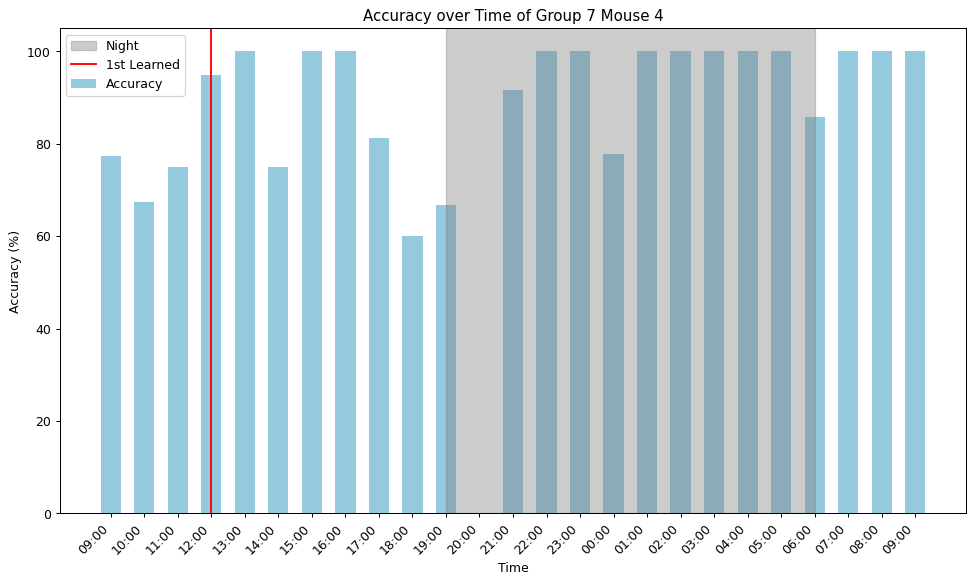

In [44]:
ctrl_times = []

for each in paths.fr1_ctrl_sheet:
    data, info = instant_acc(sheet=each, parent=path)
    stamp, hrs = time_high_acc(data)
    ctrl_times.append(hrs)
    graph_instant_acc(data, info[0], info[1], stamp)

### CASK Group

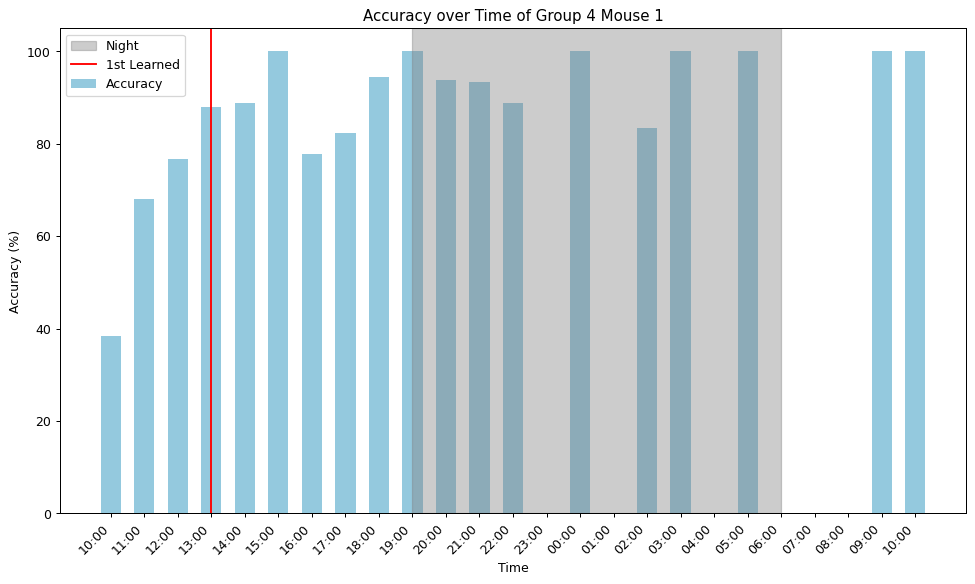

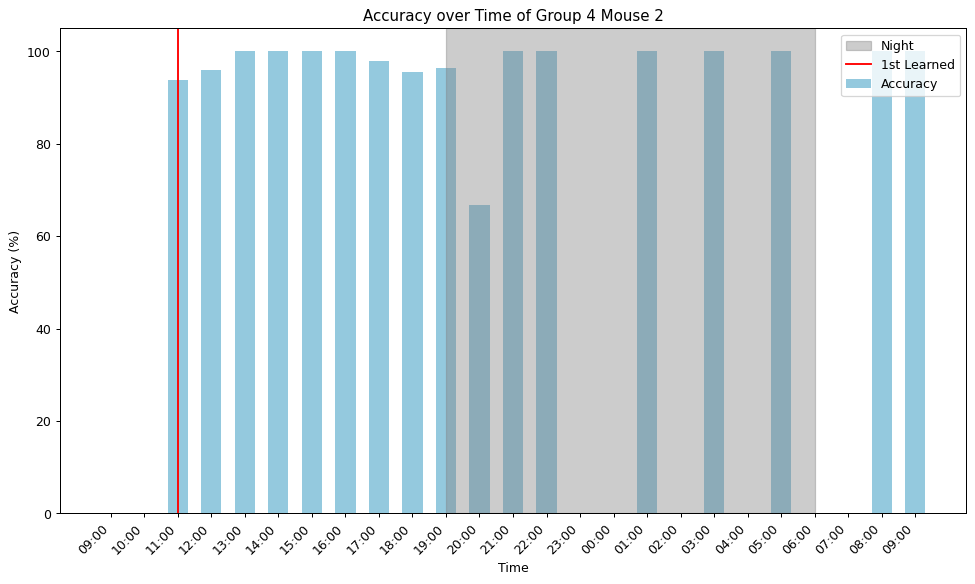

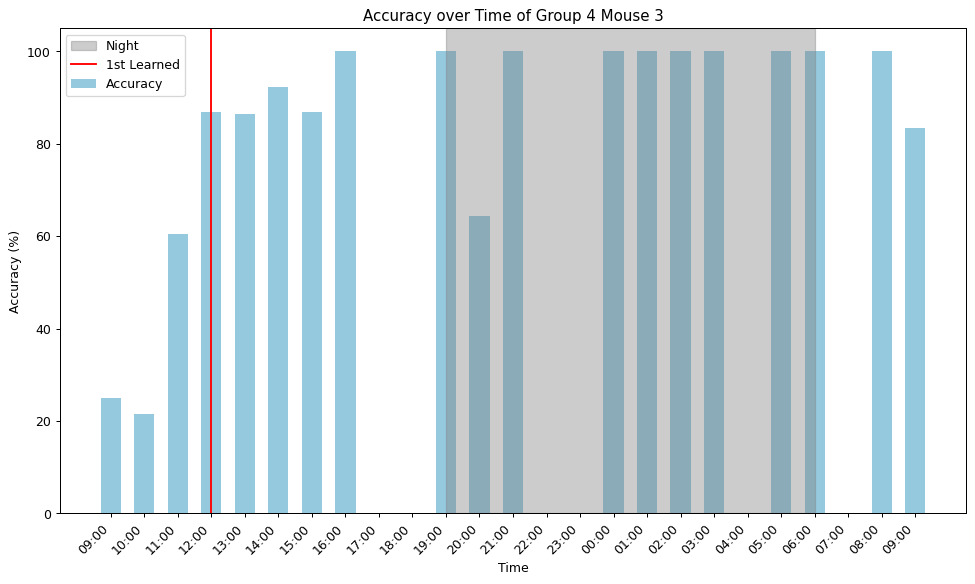

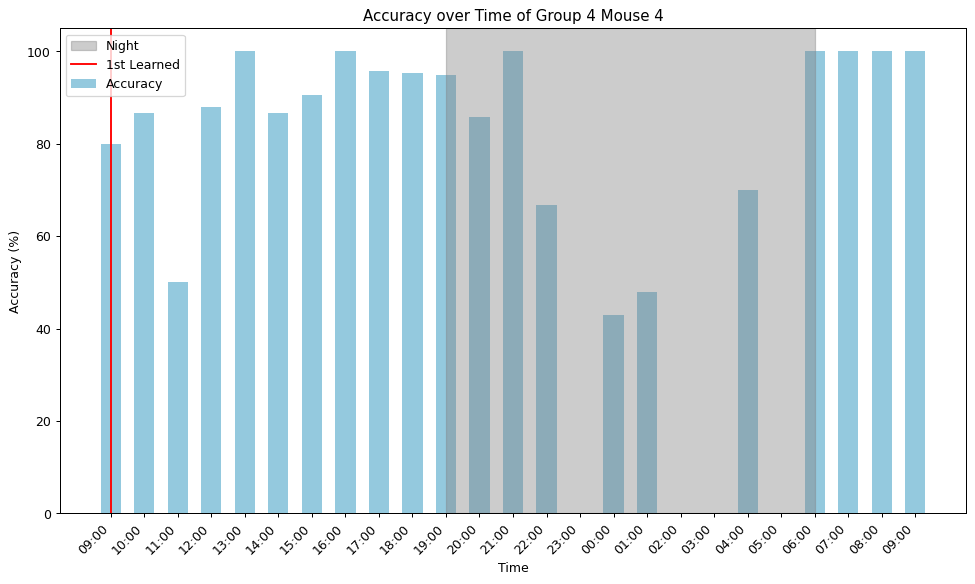

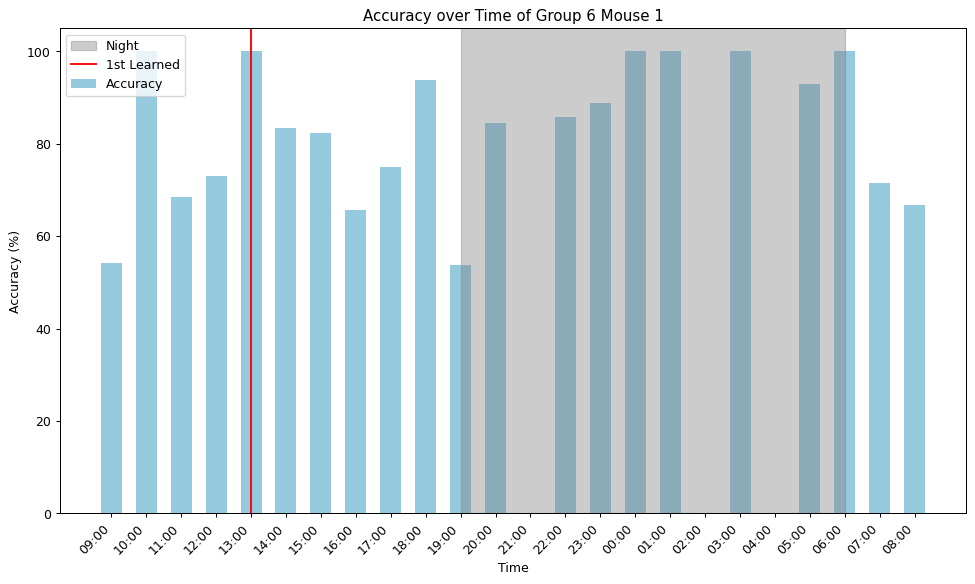

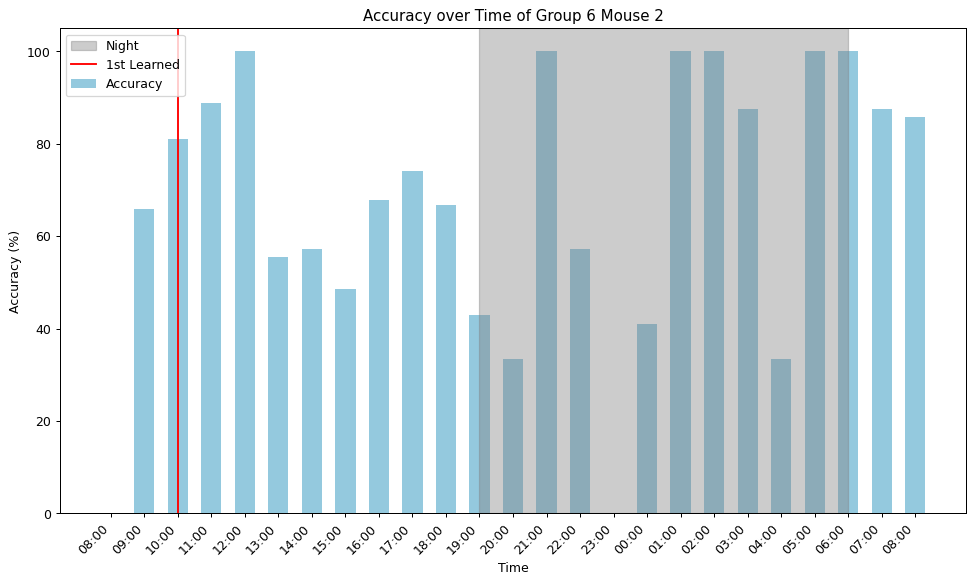

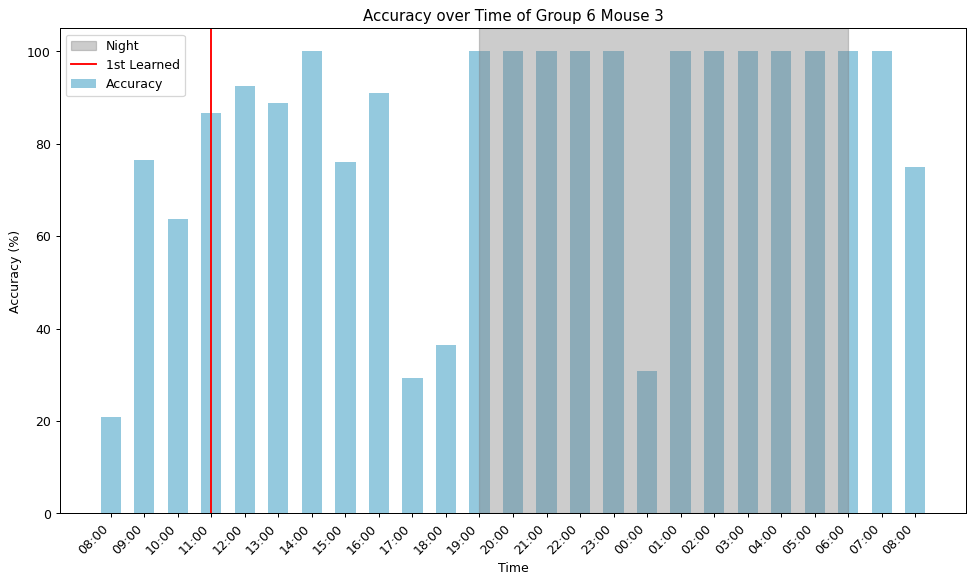

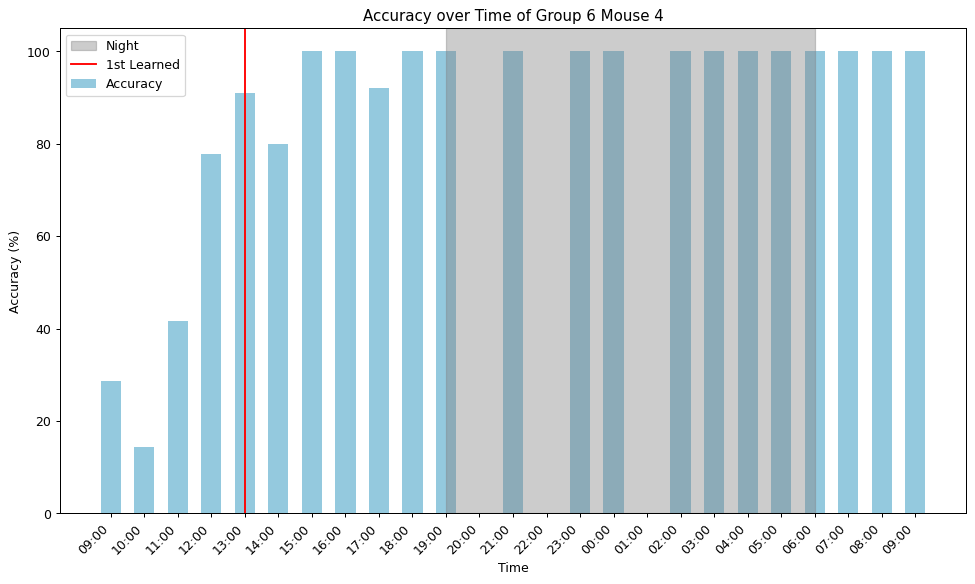

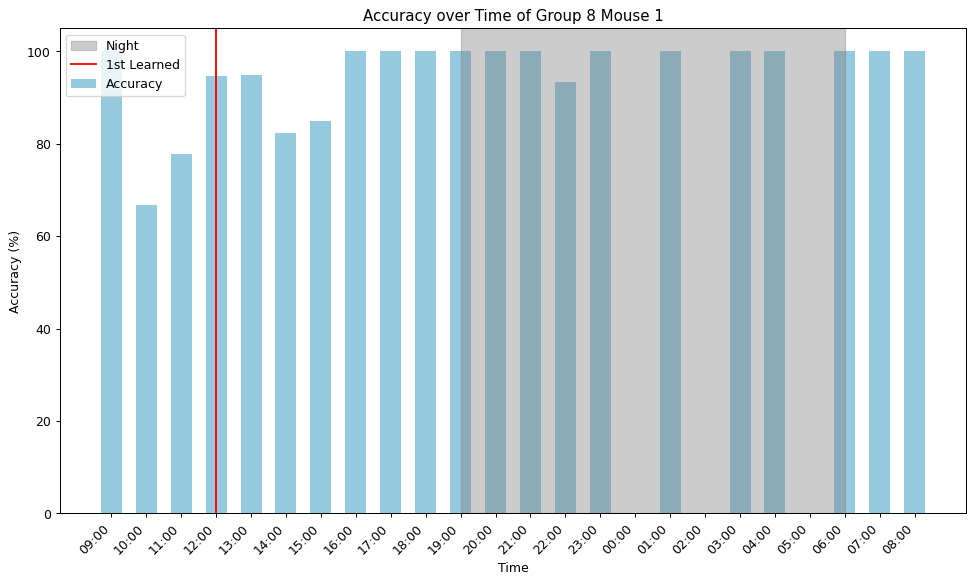

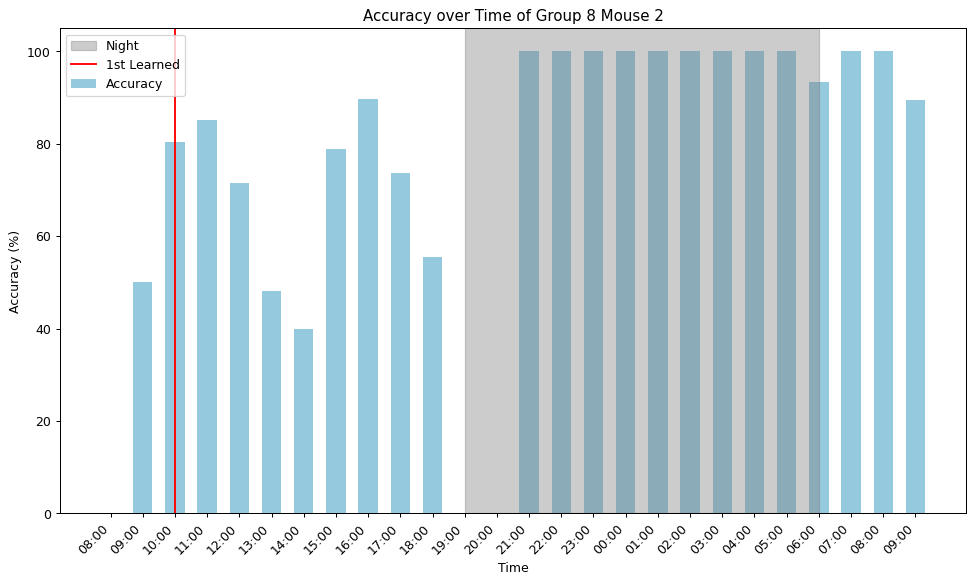

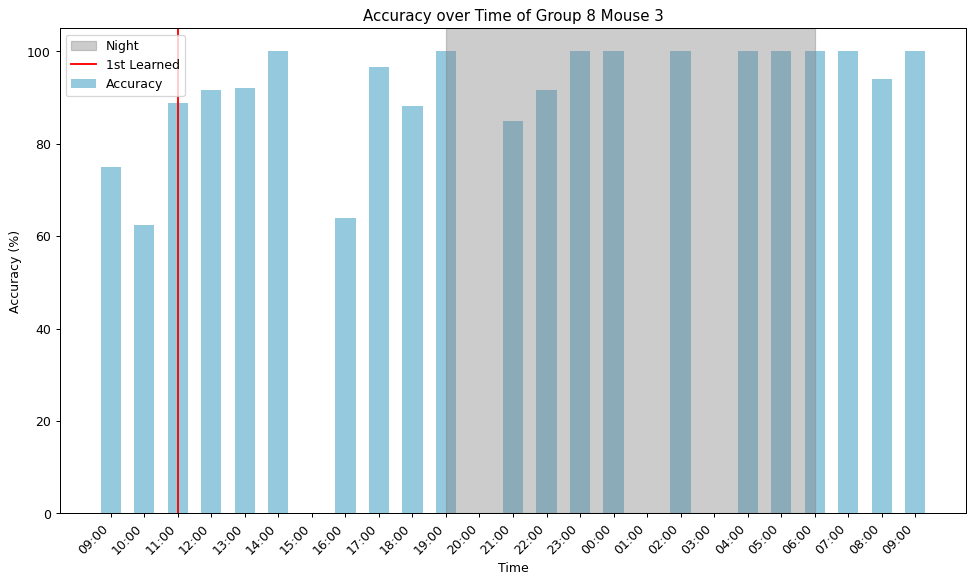

In [45]:
cask_times = []

for each in paths.fr1_cask_sheet:
    data, info = instant_acc(sheet=each, parent=path)
    stamp, hrs = time_high_acc(data)
    cask_times.append(hrs)
    graph_instant_acc(data, info[0], info[1], stamp)

### Analysis

In [46]:
print("Control Group 1st Learned Time:", ctrl_times)
print("CASK Group 1st Learned Time:", cask_times)

Control Group 1st Learned Time: [5.0, 6.0, 16.0, 14.0, 19.0, 6.0, 4.0, 7.0, 1.0, 5.0, 3.0]
CASK Group 1st Learned Time: [3.0, 2.0, 3.0, 0.0, 4.0, 2.0, 3.0, 4.0, 3.0, 2.0, 2.0]


#### Time need to reach 80% for 2 cont. hours

In [47]:
# remove outliers (1 minimum and 1 maximum)
# ctrl_times.remove(max(ctrl_times))
# cask_times.remove(max(cask_times))
# ctrl_times.remove(min(ctrl_times))
# cask_times.remove(min(cask_times))

In [48]:
invs.perform_T_test(ctrl_times, cask_times, test_side='less')

P Value is  0.003919486446636208
Experiment group is significantly less than control group


#### Control and CASK Groups have significant difference between time taken to reach 2 cont. hour of high accuracy and ending correct rate

#### Ctrl/Cask Ending/Overall Correct Rate

In [49]:
invs.perform_T_test(ctrl_ending_corr, cask_ending_corr, test_side='greater')

P Value is  0.0032073213710726908
Experiment group is significantly greater than control group


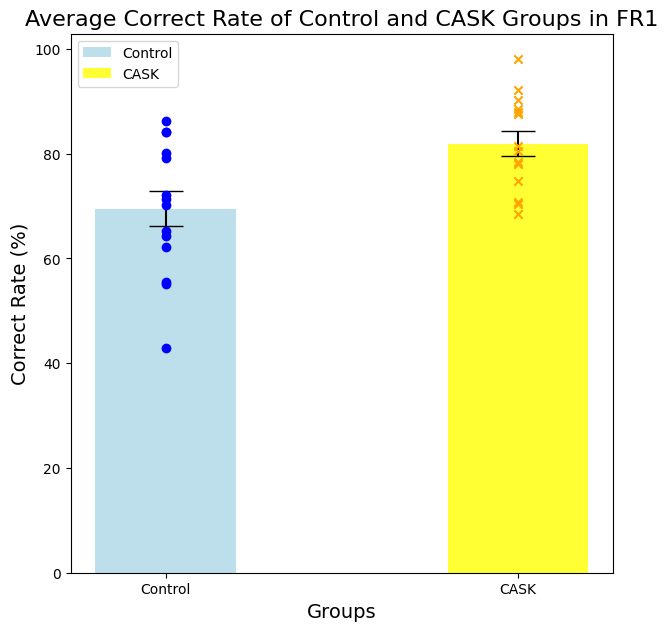

In [50]:
graph_avg_corr_rate(ctrl=ctrl_ending_corr, exp=cask_ending_corr, exp_group_name='CASK')

* Overall, mice in CASK Group has higher correct rate at the end of the session
May do further analysis/stats test